# Problem 1

Given the system of nonlinear equations,

\begin{align}
\cos(xy) + \sin(x^4+y^4) &= 1\\
x^2 + y^2 + \sin(xy) &= 3
\end{align}

1. Locate approximate solutions inside the square $−3 < x, y < 3$ using the graphic method.
2. Write a Matlab program using one of the methods (that have been presented in the course) to find all solutions of the system inside the square $−2 \leq x, y \leq 2$.
3. Estimate the absolute error for each found solution.

In [504]:
%matplotlib notebook

In [505]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

x = np.arange(-3.0, 3.0, 0.01)
y = np.arange(-3.0, 3.0, 0.01)
X, Y = np.meshgrid(x, y)
Z1 = cos(X*Y) + sin(X**4 + Y**4) - 1
Z2 = X**2 + Y**2 + sin(X*Y) - 3
v = [0, 0]

<IPython.core.display.Javascript object>


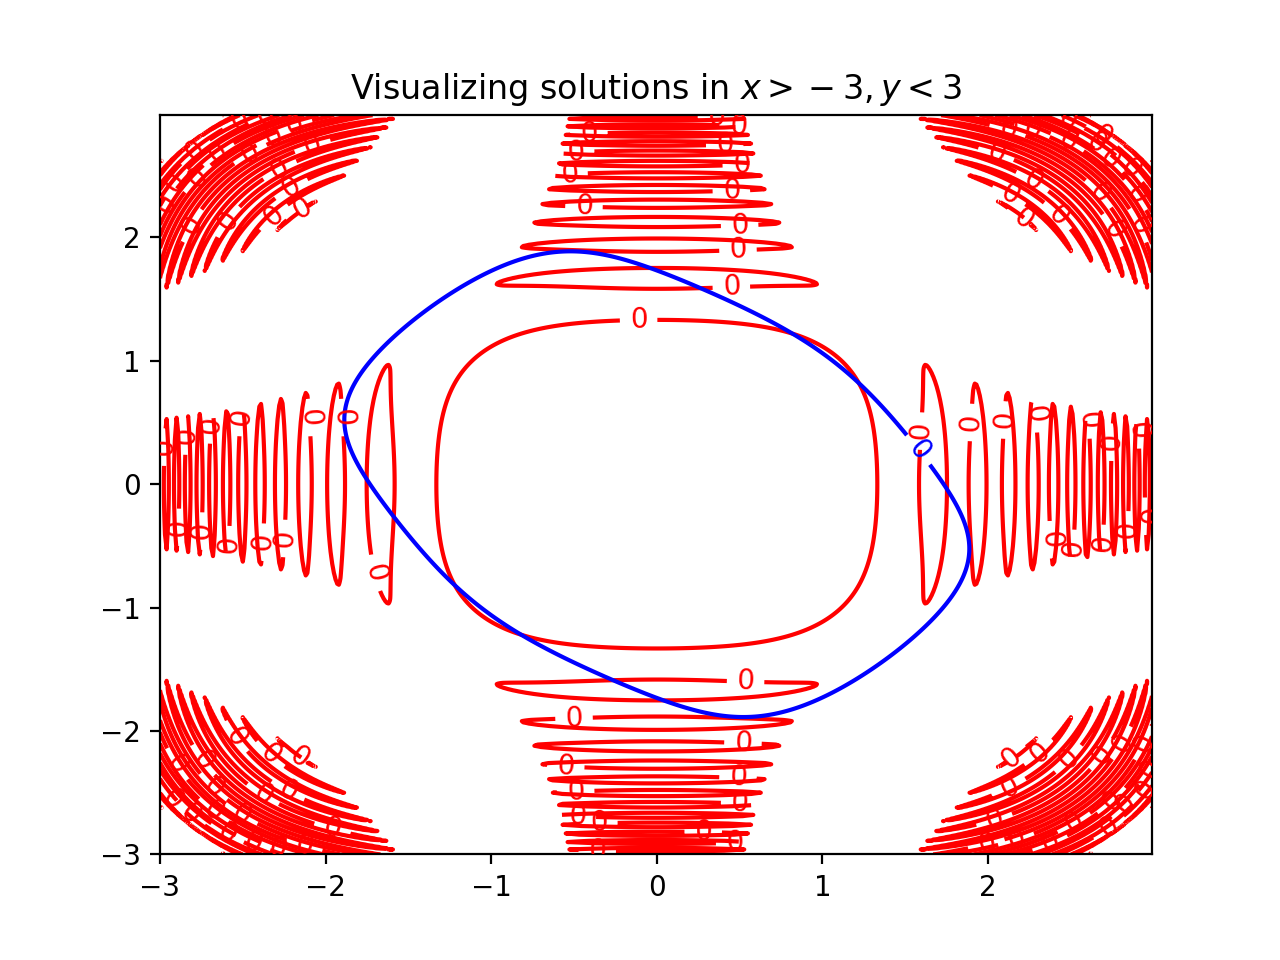

In [506]:
fig, ax = plt.subplots()
CS1 = ax.contour(X, Y, Z1, 0, colors='red')
CS2 = ax.contour(X, Y, Z2, 0, colors='blue')
ax.clabel(CS1, inline=True, fontsize=10)
ax.clabel(CS2, inline=True, fontsize=10)
ax.set_title(r'Visualizing solutions in $x>-3, y<3$')
fig.savefig('a.png', dpi=300)

In [507]:
from sympy import *

In [508]:
x, y = symbols('x y')

f = cos(x*y) + sin(x**4 + y**4) - 1
g = x**2 + y**2 + sin(x*y) - 3

f_x = diff(f, x)
f_y = diff(f, y)
g_x = diff(g, x)
g_y = diff(g, y)

f_x, f_y, g_x, g_y

(4*x**3*cos(x**4 + y**4) - y*sin(x*y),
 -x*sin(x*y) + 4*y**3*cos(x**4 + y**4),
 2*x + y*cos(x*y),
 x*cos(x*y) + 2*y)

In [509]:
import numpy as np
import random
import copy

cos = np.cos
sin = np.sin
exp = np.exp

In [510]:
def J(x):
    return np.array([
        [4*x[0]**3*cos(x[0]**4 + x[1]**4) - x[1]*sin(x[0]*x[1]), -x[0]*sin(x[0]*x[1]) + 4*x[1]**3*cos(x[0]**4 + x[1]**4)],
        [2*x[0] + x[1]*cos(x[0]*x[1]), x[0]*cos(x[0]*x[1]) + 2*x[1]]
    ])

def F(x):
    return np.array([cos(x[0]*x[1]) + sin(x[0]**4 + x[1]**4) - 1, x[0]**2 + x[1]**2 + sin(x[0]*x[1]) - 3])

In [514]:
def Gauss_Seidel(A, b, tol):
    """
    Standard Gauss-Seidel method to solve Ax=b
    """
    
    m = A.shape[0] # A is an n x n matrix
    n = A.shape[1] 
    if (m!=n):
        print(r'Matrix $A$ is not square!')
        return

    # initialize x and x_new 
    x = np.zeros(n)
    x_n = np.zeros(n)

    # counter for number of iterations
    # norm_x is the conventional Euclidean norm
    # for stopping criterion: ||x-x_n||^2
    iteration_counter = 0
    norm_x = 1

    while (abs(norm_x) > tol) and (iteration_counter < 100):
        for i in range(n):
            x_n[i] = b[i]/A[i,i]
            sum = 0
            # Standard Gauss-Seidel update
            for j in range(n):
                if (j<i): sum+=A[i,j]*x_n[j]
                if (j>i): sum+=A[i,j]*x[j]
            x_n[i] -= sum/A[i,i]
        norm_x = np.linalg.norm(x-x_n, ord=2)
        # update guess x
        for i in range(n):
            x[i]=x_n[i]
        iteration_counter += 1
        
    return x

def Newton_Raphson(F, J, x, tol):
    """
    Standard Newton-Raphson method to solve a system of
    nonlinear equation. For simplicity we pre-calculated
    the Jacobian matrix J (hence this function is native
    to the above presented system of nonlinear equations)
    """
    
    Fval = F(x)
    norm_f = np.linalg.norm(Fval, ord=2)
    iteration_counter = 0
    
    while (abs(norm_f) > tol) and (iteration_counter < 100):
        print(f'{iteration_counter}-th iteration!')
        # Delta = Gauss_Seidel(J(x), -Fval, tol) # My own Gauss-Seidel
        Delta = np.linalg.solve(J(x), -Fval) # Scipy built-in solver
        x = x + Delta # Update x
        Fval = F(x) # Re-compute F
        norm_f = np.linalg.norm(Fval, ord=2) # Euclidean norm of F is used for stopping criterion.
        iteration_counter += 1               # If X is sufficiently close to the exact solution, then F(X) ~ 0
        abs_error = (np.linalg.norm(Delta, ord=2))/(np.linalg.norm(x, ord=2)) # Absolute error
        print(f'Absolute error is {abs_error}!')

    return x, iteration_counter        

In [515]:
# Test Gauss-Seidel / Compare with standard np.linalg.solver
A = np.array([[4.,2.,-2.],[4.,9.,-3.],[-2.,-3.,7.]])
b = np.array([2.,8.,10.])

Gauss_Seidel(A, b, tol=1e-8), np.linalg.solve(A, b)

(array([1.025, 1.175, 2.225]), array([1.025, 1.175, 2.225]))

In [513]:
init_guesses = np.array([[1.224, 0.815], [0.815, 1.224], [0.265, 1.500], [1.58, 0.27], 
                         [-0.05, 1.750], [-1.750, 0.05], [-1.225, -0.80], 
                         [-0.8, -1.3], [-1.584, -0.265], [-0.27, -1.59], 
                         [0.05, -1.73], [1.752, -0.072]])

sols = []
for guess in init_guesses:
    sols.append(Newton_Raphson(F, J, guess, tol=1e-10))

0-th iteration!
Absolute error is 0.0038142917331222426!
1-th iteration!
Absolute error is 7.138129705137766e-05!
2-th iteration!
Absolute error is 2.1640319133512086e-08!
0-th iteration!
Absolute error is 0.0038142917331222413!
1-th iteration!
Absolute error is 7.138129705137765e-05!
2-th iteration!
Absolute error is 2.16403191335121e-08!
0-th iteration!
Absolute error is 0.1594978536974141!
1-th iteration!
Absolute error is 0.1292766726424588!
2-th iteration!
Absolute error is 0.10961439419940308!
3-th iteration!
Absolute error is 0.058206486320930076!
4-th iteration!
Absolute error is 0.008729041120496776!
5-th iteration!
Absolute error is 6.597856677344042e-05!
6-th iteration!
Absolute error is 3.3891241232735616e-09!
0-th iteration!
Absolute error is 0.0064189775755487235!
1-th iteration!
Absolute error is 6.825780880522552e-05!
2-th iteration!
Absolute error is 6.336530199594782e-10!
0-th iteration!
Absolute error is 0.005467203699429805!
1-th iteration!
Absolute error is 2.89542

In [217]:
Newton_Raphson(F, J, init_guesses[11], tol=1e-10)

0-th iteration!
Absolute error is 0.018183481084806347!
1-th iteration!
Absolute error is 0.00031837121780965564!
2-th iteration!
Absolute error is 1.006800096142393e-07!


(array([ 1.75201771, -0.0406855 ]), 3)

# Problem 2

Given the matrix $A$ such that

\begin{align}
A = \begin{pmatrix}
1 & 1 & 1 & 2 & 3 \\
2 & 3 & 2 & 1 & 2 \\
1 & 2 & 2 & 1 & 1 \\
1 & 2 & 0 & 4 & 1 \\ 
2 & 2 & 1 & 4 & 6\end{pmatrix}
\end{align}

1. Write a Matlab script using numerical methods to find at least 3 eigenvalues and the corresponding eigenvectors of the matrix $A$.
2. Discuss the advantage/disadvantage of your chosen method.

In [497]:
def numSUM(mat):
    """
    Function for counting the number of zeros element in a matrix `mat`
    Tolerance is 1e-4.
    """
    zeros = 0
    for i in range(mat.shape[0]):
        for j in range(mat.shape[0]):
            if abs(mat[i,j]) < 1e-4:
                zeros += 1
    return zeros

In [498]:
from qiskit.visualization import array_to_latex

# the original matrix
matA = np.array([
            [1.0, 1.0, 1.0, 2.0, 3.0],
            [2.0, 3.0, 2.0, 1.0, 2.0],
            [1.0, 2.0, 2.0, 1.0, 1.0],
            [1.0, 2.0, 0.0, 4.0, 1.0],
            [2.0, 2.0, 1.0, 4.0, 6.0]])

sizeA = matA.shape[0] # size matrix, 5

max_iteration = 100 
iteration_counter = 0
delta_sum_zero = 0
sum_zero = 0
Flag = False

while Flag == False and iteration_counter < max_iteration:
    Q, R = np.linalg.qr(matA) # using built-in function. I hope we're allowed to do this
    matA = R@Q # Flip QR => RQ to for similarity transformation
    iteration_counter += 1
    # below are just stopping criterion, described in the report
    if iteration_counter % sizeA == 0:
        delta_sum_zero = numSUM(matA) - sum_zero
        if delta_sum_zero == 0:
            Flag = True
    sum_zero = numSUM(matA)
    
array_to_latex(matA)

<IPython.core.display.Latex object>

In [499]:
# finding immediate non-zero elements below diagonals
non_zeros = []
zeros = []

for i in range(sizeA-1):
    if abs(matA[i+1][i]) > 1e-3:
        non_zeros.append(i)
submats = []

# construction of 2x2 sub-matrices
for index in non_zeros:
    submats.append(np.array([
        [matA[index][index], matA[index][index+1]],
        [matA[index+1][index], matA[index+1][index+1]]
    ]))
    
import cmath

def characteristics_polynomial(mat):
    a = 1.0
    b = -(mat[0][0]+mat[1][1])
    c = mat[0][0]*mat[1][1]-mat[0][1]*mat[1][0]
    x = (-b + cmath.sqrt(b**2-4*a*c))/2
    return x

eigvals = []
eigvals.append(matA[0][0])

for mat in submats:
    eigval = characteristics_polynomial(mat)
    eigvals.append(eigval)
    eigvals.append(np.conjugate(eigval))

eigvals

[10.275449811366837,
 (2.5857257631985426+0.7420769751641203j),
 (2.5857257631985426-0.7420769751641203j),
 (0.2765493311180412+0.06487757019367126j),
 (0.2765493311180412-0.06487757019367126j)]

In [500]:
matA = np.array([
            [1.0, 1.0, 1.0, 2.0, 3.0],
            [2.0, 3.0, 2.0, 1.0, 2.0],
            [1.0, 2.0, 2.0, 1.0, 1.0],
            [1.0, 2.0, 0.0, 4.0, 1.0],
            [2.0, 2.0, 1.0, 4.0, 6.0]])

A_tilde = matA

for i in range(sizeA):
    A_tilde[i][i] = matA[i][i] - eigvals[0]

zeros_vec = np.zeros([sizeA, 1])
eigen_vec1 = Gauss_Seidel(A_tilde, zeros_vec, tol=1e-8)
eigen_vec2 = np.linalg.solve(A_tilde, zeros_vec)

# eigen_vec1

In [501]:
eigen_vec1

array([0., 0., 0., 0., 0.])

In [502]:
eigen_vec2

array([[-0.],
       [-0.],
       [-0.],
       [-0.],
       [-0.]])

In [503]:
A_tilde

array([[-9.27544981,  1.        ,  1.        ,  2.        ,  3.        ],
       [ 2.        , -7.27544981,  2.        ,  1.        ,  2.        ],
       [ 1.        ,  2.        , -8.27544981,  1.        ,  1.        ],
       [ 1.        ,  2.        ,  0.        , -6.27544981,  1.        ],
       [ 2.        ,  2.        ,  1.        ,  4.        , -4.27544981]])